You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view? 


Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df= pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

No missing values are found

1. We can see that glucose blood pressure, skin Thickness, insulin, bmi is zero in many case which is not possible, hence we will try to remove it or replace it with median values.

2. Similarly we will ploy boxplot and histogram to see the data , if noice or zero value found then we will replace with mean median or mode.

<AxesSubplot: >

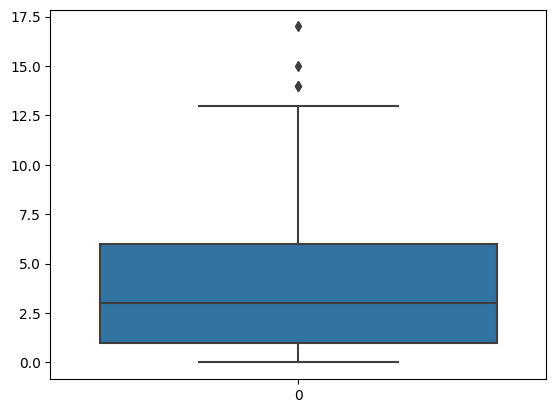

In [4]:
sns.boxplot(df.Pregnancies)  

as we see no noice is there in Pregnancy, few outliers are there but they could be possible values

<AxesSubplot: >

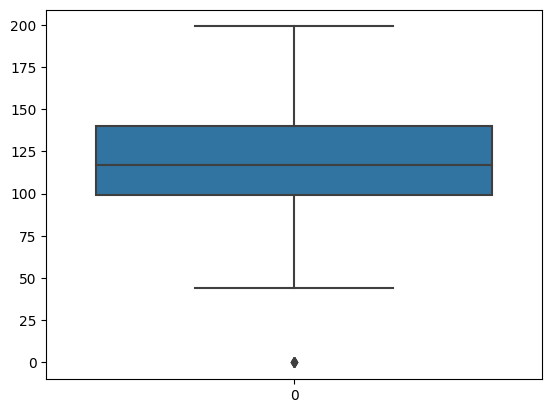

In [5]:
sns.boxplot(df.Glucose)

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

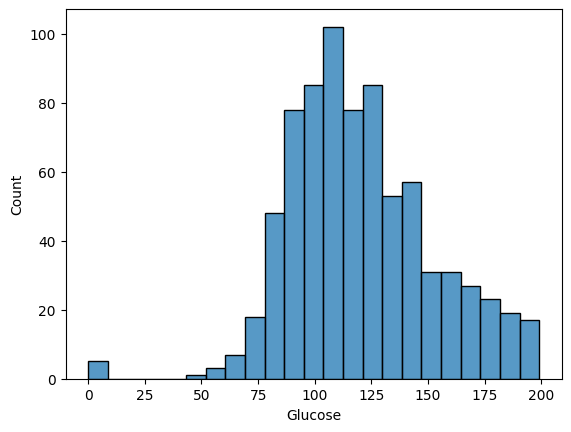

In [6]:
sns.histplot(df.Glucose)

It is clear that 0 glucose is not possible hence we can remove this as few velues have zero.


In [7]:
median = df.Glucose.median()
df.Glucose = df.Glucose.replace(0, median)

<AxesSubplot: >

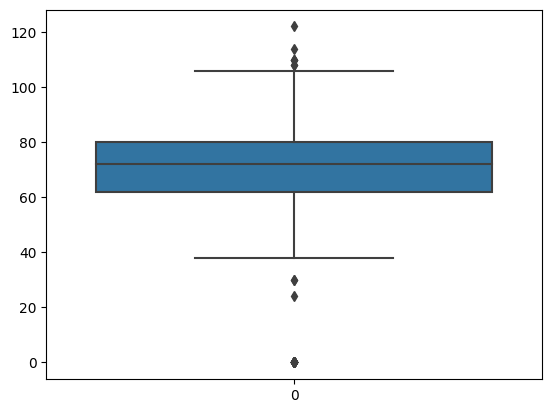

In [8]:
sns.boxplot(df.BloodPressure)

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

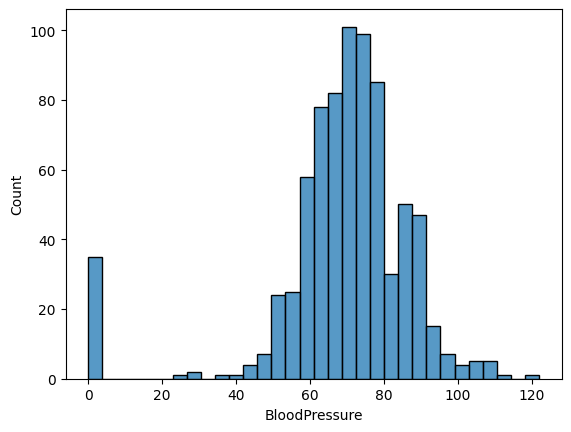

In [9]:
sns.histplot(df.BloodPressure)

In [10]:
median = df.BloodPressure.median()
df.BloodPressure = df.BloodPressure.replace(0, median)

<AxesSubplot: >

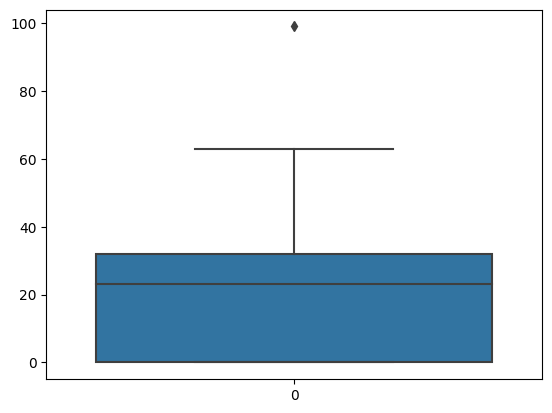

In [11]:
sns.boxplot(df.SkinThickness)

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

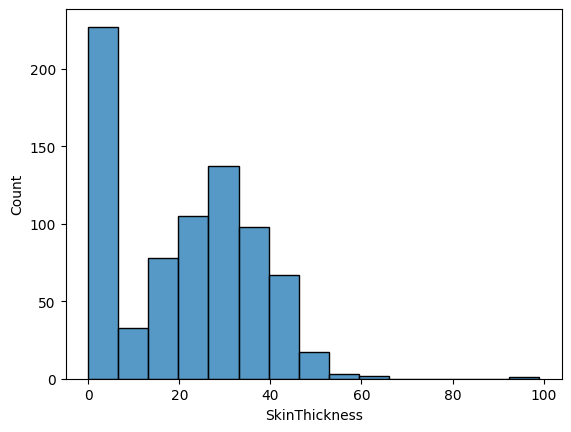

In [12]:
sns.histplot(df.SkinThickness)

In [13]:
df.SkinThickness = df.SkinThickness.replace(0, 30)
df = df.drop(df[df.SkinThickness==99].index)

<AxesSubplot: >

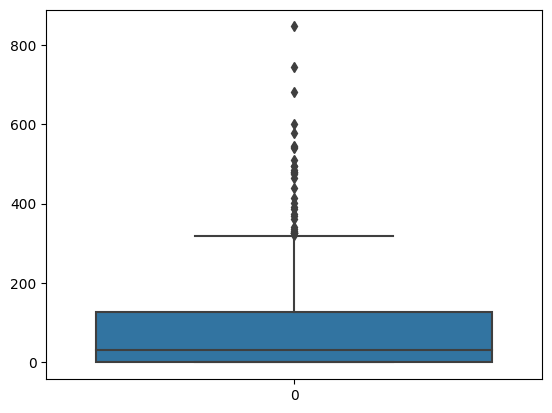

In [14]:
sns.boxplot(df.Insulin)

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

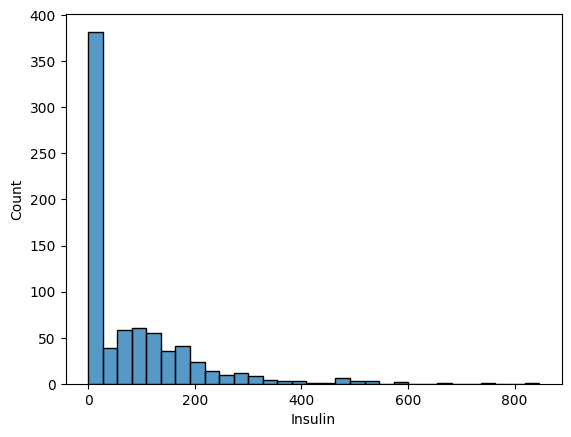

In [15]:
sns.histplot(df.Insulin)

In [16]:
df.Insulin = df.Insulin.replace(0, 100)

<AxesSubplot: >

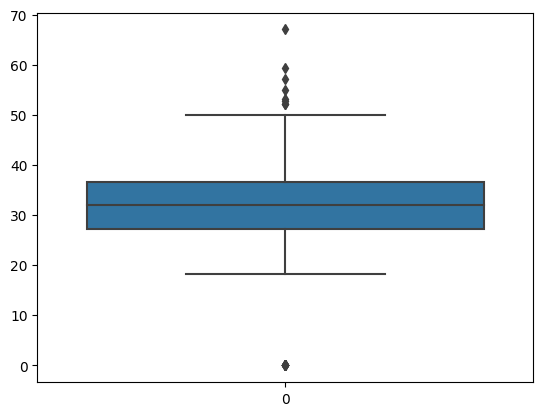

In [17]:
sns.boxplot(df.BMI)

<AxesSubplot: xlabel='BMI', ylabel='Count'>

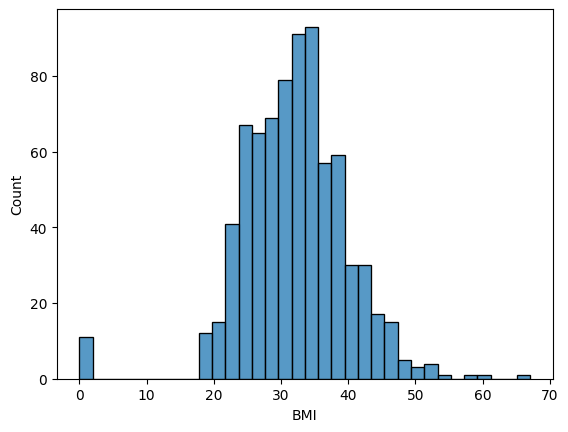

In [18]:
sns.histplot(df.BMI)

In [19]:
mode = df.BMI.mode()[0]
df.BMI = df.BMI.replace(0, mode)

In [20]:
mode

32.0

<AxesSubplot: >

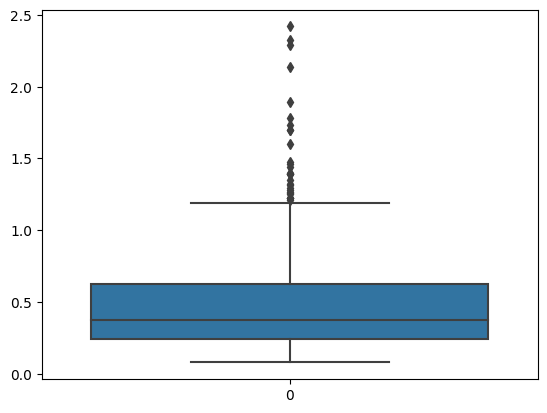

In [21]:
sns.boxplot(df.DiabetesPedigreeFunction)

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

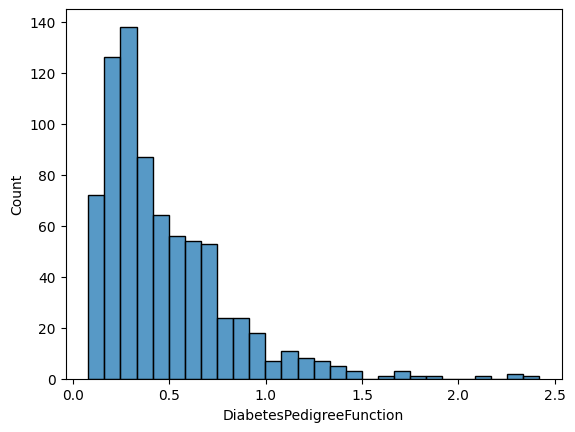

In [22]:
sns.histplot(df.DiabetesPedigreeFunction)

<AxesSubplot: >

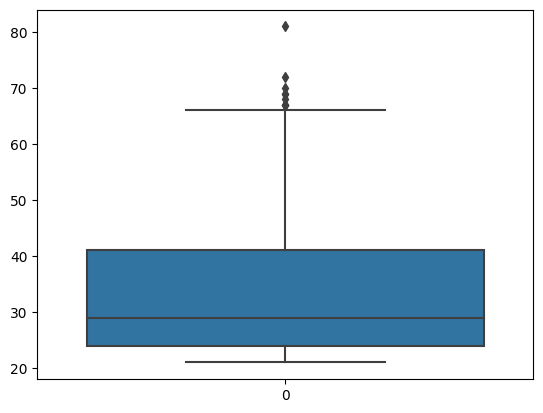

In [23]:
sns.boxplot(df.Age)

<AxesSubplot: xlabel='Age', ylabel='Count'>

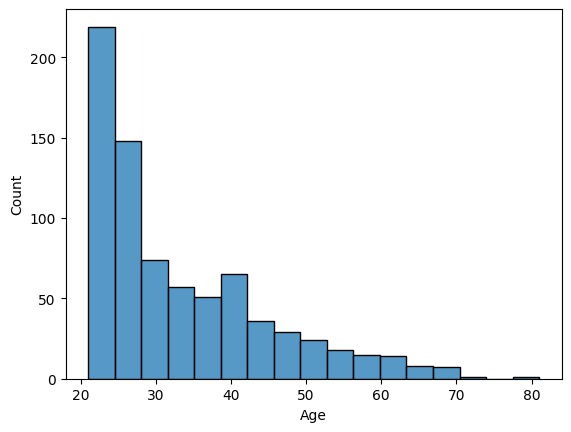

In [24]:
sns.histplot(df.Age)

<AxesSubplot: >

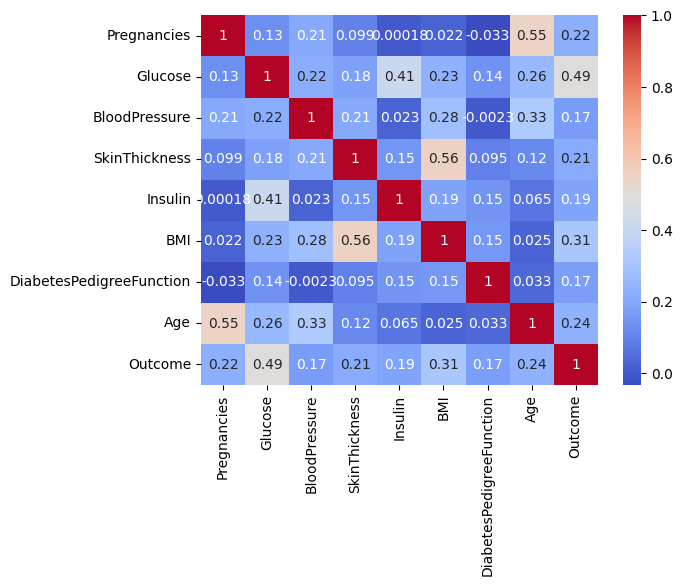

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

We found that most of the independent features are not correlative which is good,

Glucose level, BMI is good indicator of diabities

In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,100,33.6,0.627,50,1
1,1,85,66,29,100,26.6,0.351,31,0
2,8,183,64,30,100,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,100,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,30,100,30.1,0.349,47,1


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [27]:
X = df.drop('Outcome', axis=1)

y = df.Outcome
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


dtc = DecisionTreeClassifier(criterion='entropy')
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a grid search object to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(dtc, param_grid=params, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and use them to train a decision tree model
best_params = grid_search.best_params_
dtc = DecisionTreeClassifier(**best_params)
dtc.fit(X_train, y_train)

# Predict the labels of the test set using the trained model
y_pred = dtc.predict(X_test)

# Evaluate the accuracy of the model on the test set
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)
print (classification_report(y_pred, y_test))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        88
           1       0.78      0.59      0.67        66

    accuracy                           0.75       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.76      0.75      0.75       154



In [29]:
best_params

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [30]:
!pip install dtreeviz

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [31]:
# Visualize the decision tree using dtreeviz
from dtreeviz.trees import *
viz = dtreeviz(dtc, X_train, y_train, target_name='species', feature_names=iris.feature_names)
viz.save('decision_tree.svg')

NameError: name 'dtreeviz' is not defined

In [32]:
!pip install dtreeviz

In [33]:
from sklearn.tree import export_graphviz
import graphviz
# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtc, out_file=None, 
                feature_names=X.columns,  
                class_names='Outcomes',  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris_decision_tree")

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

as we tried to use dtreeviz but fail to use it hence we simply use tree.

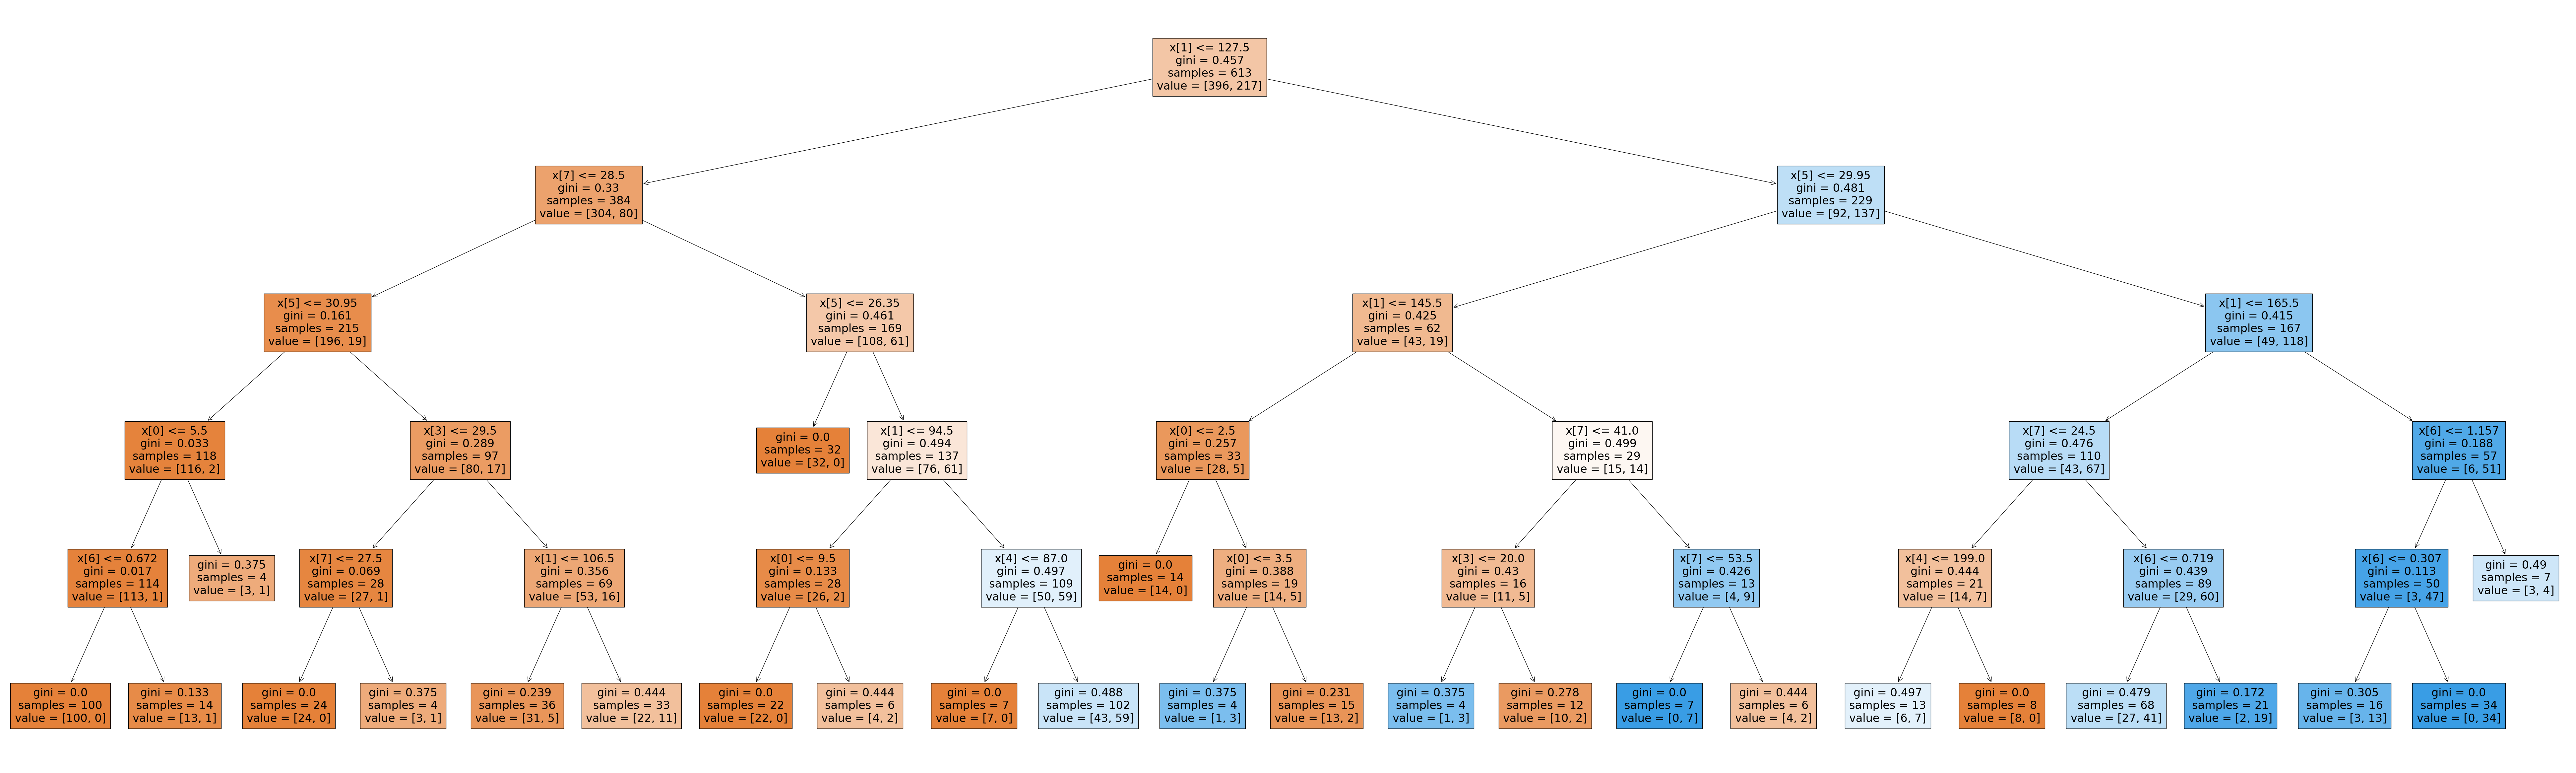

In [34]:
from sklearn import tree
plt.figure(figsize=(100,30))
tree.plot_tree(dtc,filled=True)
plt.show()

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

We saw that tree split start from glucose level,and next subbranches have features like  BMI and age

We know that if glucose level is above 105 is indicator of high sugar level, hence first split is based on the glucose level. On making 127.5 as a threshold we categorize 304 as negative out of 396 and only 80 wrong categorised out of 217.
As the first level on left side have most of non debetic patients, with low glucose value, then we use Age feature with threshold 28.5year so that below that age are maximum non diebtic patient.

In the first level on right side have most of dibetic patients, with high value glucose, we use BMI feature as we know fat people have high chances of debetice. hence people with low BMI 29.95 have lower chance of disease.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Ans:- 

In [35]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [36]:
test_input = [[1,100,8,35,10,33.6,0.627,30]]
dtc.predict(test_input)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


array([0])

By changing the various variable we can check the sensitivity and uncertainty and risks of out model.